## MET CS677 Data Science with Python - Assignment 4
### Alan Szmyt
#### Built with Python 3.10.6

In [1]:
!python --version

Python 3.10.6


In [2]:
%%javascript
MathJax.Hub.Config({
    tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        processEscapes: true
    },
    tex: {
        packages: {'[+]': ['require']},
    },
});

<IPython.core.display.Javascript object>

In [3]:
from collections import defaultdict
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Latex
from pandas import DataFrame

from assignment4 import DeathEvent, LinearModelAnalytics, LinearModelMetrics
from constants import (
    COL_CPK,
    COL_DEATH_EVENT,
    COL_SERUM_SODIUM,
    INITIAL_COLS,
    COL_PLATELETS,
    COL_SERUM_CREATININE,
)
from utils import (
    artifacts,
    data,
    examine_correlation_matrix,
    plot_correlation_matrix, create_latex_table
)

# Global Seaborn options.
sns.set_theme(font_scale=1.5, rc={"text.usetex": True})

cwd: Path = Path.cwd()

In [4]:
# Heart failure clinical records dataset file from UCI.
dataset_csv: str = "heart_failure_clinical_records_dataset.csv"
heart_failure_dataset_file: Path = data.joinpath(dataset_csv)

In [5]:
# dtype mapping to use for the csv file. Set death_event to categorical.
dtypes: dict = defaultdict(
    np.float64,
    {
        COL_DEATH_EVENT: pd.CategoricalDtype.name,
        COL_CPK: np.int64,
        COL_SERUM_SODIUM: np.int64,
    },
)

# Load the heart failure records into a dataframe.
heart_failure_dataset: DataFrame = pd.read_csv(
    heart_failure_dataset_file, usecols=INITIAL_COLS, dtype=dtypes
)

In [6]:
# Load the survivors into their own dataframe.
survivors: DataFrame = heart_failure_dataset.loc[
    heart_failure_dataset[COL_DEATH_EVENT].astype(int) == DeathEvent.SURVIVOR
]

# Load the deceased into their own dataframe.
deceased: DataFrame = heart_failure_dataset.loc[
    heart_failure_dataset[COL_DEATH_EVENT].astype(int) == DeathEvent.DECEASED
]

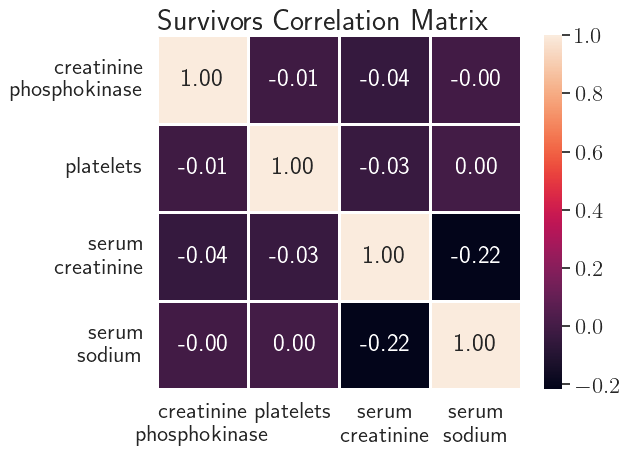

In [7]:
# Plot a correlation matrix for the 'survivors' dataset.
survivors_correlations: DataFrame = plot_correlation_matrix(
    survivors,
    title="Survivors Correlation Matrix",
    output_dir=artifacts
)

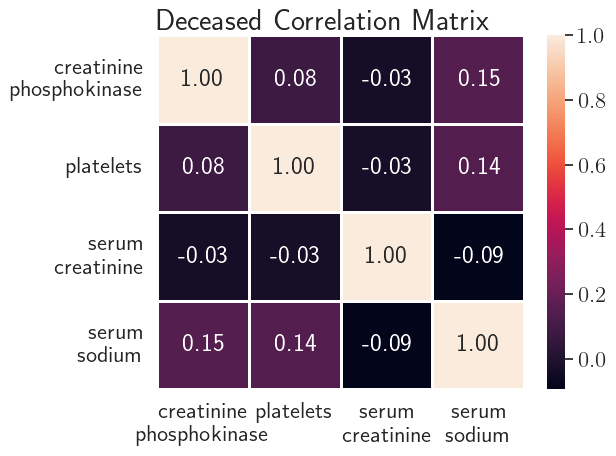

In [8]:
# Plot a correlation matrix for the 'deceased' dataset.
deceased_correlations: DataFrame = plot_correlation_matrix(
    deceased,
    title="Deceased Correlation Matrix",
    output_dir=artifacts
)

In [9]:
# Examine the survivor patients' correlation matrix.
s_correlations = examine_correlation_matrix(survivors_correlations)

# Examine the deceased patients' correlation matrix.
d_correlations = examine_correlation_matrix(deceased_correlations)

In [10]:
# Survivors highest correlation features.
shc_features = list(s_correlations.head(1).to_dict().items())[0]
print(
    f"The features with the highest correlation for surviving patients"
    f" were '{shc_features[0][0]}' and '{shc_features[0][1]}' with"
    f" a correlation value of {shc_features[1]:.3f}."
)

The features with the highest correlation for surviving patients were 'serum_creatinine' and 'serum_sodium' with a correlation value of 0.216.


In [11]:
# Question 1.3.b
# Survivors lowest correlation features.
slc_features = list(s_correlations.tail(1).to_dict().items())[0]
print(
    f"The features with the lowest correlation for surviving patients"
    f" were '{slc_features[0][0]}' and '{slc_features[0][1]}' with"
    f" a correlation value of {slc_features[1]:.3f}."
)

The features with the lowest correlation for surviving patients were 'platelets' and 'serum_sodium' with a correlation value of 0.002.


In [12]:
# Question 1.3.c
# Deceased patients' highest correlation features.
dhc_features = list(d_correlations.head(1).to_dict().items())[0]
print(
    f"The features with the highest correlation for deceased patients"
    f" were '{dhc_features[0][0]}' and '{dhc_features[0][1]}' with"
    f" a correlation value of {dhc_features[1]:.3f}."
)

The features with the highest correlation for deceased patients were 'creatinine_phosphokinase' and 'serum_sodium' with a correlation value of 0.149.


In [13]:
# Question 1.3.d
# Deceased patients' lowest correlation features.
dlc_features = list(d_correlations.tail(1).to_dict().items())[0]
print(
    f"The features with the lowest correlation for deceased patients"
    f" were '{dlc_features[0][0]}' and '{dlc_features[0][1]}' with"
    f" a correlation value of {dlc_features[1]:.3f}."
)

The features with the lowest correlation for deceased patients were 'platelets' and 'serum_creatinine' with a correlation value of 0.029.


In [14]:
# Linear model analytics for different linear regression models for survivors.
survivors_linear_model_analytics: LinearModelAnalytics = LinearModelAnalytics(
    survivors,
    predictor_col=COL_PLATELETS,
    response_col=COL_SERUM_CREATININE,
)

# Linear model analytics for different linear regression models for deceased.
deceased_linear_model_analytics: LinearModelAnalytics = LinearModelAnalytics(
    deceased,
    predictor_col=COL_PLATELETS,
    response_col=COL_SERUM_CREATININE,
)

Simple linear coefficients: [-2.93473058e-07]
Sum of Squared Errors (SSE): 33.850873557207514


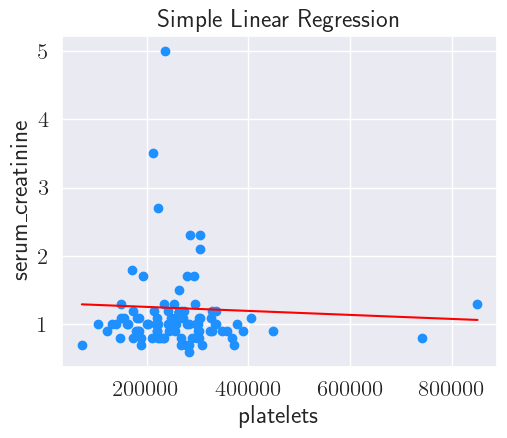

In [15]:
# Metrics for simple linear regression model for survivors.
s_slr_metrics: LinearModelMetrics = survivors_linear_model_analytics.simple
print(f"Simple linear coefficients: {s_slr_metrics.coefficients}")
print(f"Sum of Squared Errors (SSE): {s_slr_metrics.sse}")
s_slr_metrics.plot("Simple Linear Regression")

Quadratic coefficients: [-3.60956544e-06  5.51837146e-12]
Sum of Squared Errors (SSE): 38.036189854381476


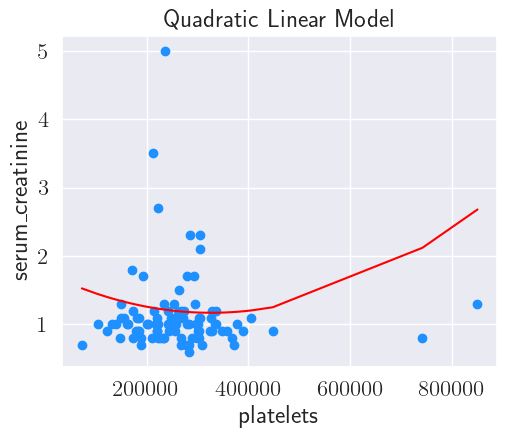

In [16]:
# Metrics for quadratic linear regression model for survivors.
s_qlr_metrics: LinearModelMetrics = survivors_linear_model_analytics.quadratic
print(f"Quadratic coefficients: {s_qlr_metrics.coefficients}")
print(f"Sum of Squared Errors (SSE): {s_qlr_metrics.sse}")
s_qlr_metrics.plot("Quadratic Linear Model")

Cubic coefficients: [-6.61695812e-07 -6.29160600e-12  1.36579315e-17]
Sum of Squared Errors (SSE): 52.42579302568393


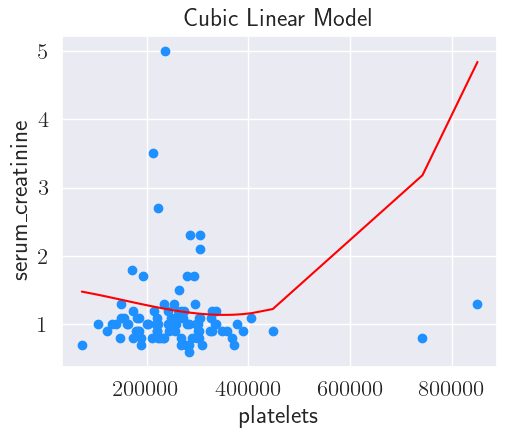

In [17]:
# Metrics for cubic linear regression model for survivors.
s_clr_metrics: LinearModelMetrics = survivors_linear_model_analytics.cubic
print(f"Cubic coefficients: {s_clr_metrics.coefficients}")
print(f"Sum of Squared Errors (SSE): {s_clr_metrics.sse}")
s_clr_metrics.plot("Cubic Linear Model")

GLM coefficients: [-0.11801909]
Sum of Squared Errors (SSE): 34.02122454853615


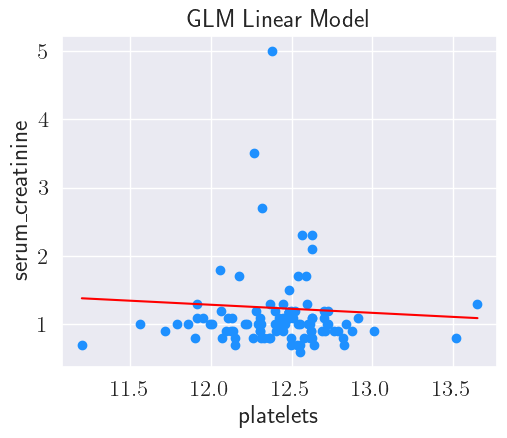

In [18]:
# Metrics for GLM #1 linear regression model for survivors.
s_glr_metrics1: LinearModelMetrics = survivors_linear_model_analytics.glm1
print(f"GLM coefficients: {s_glr_metrics1.coefficients}")
print(f"Sum of Squared Errors (SSE): {s_glr_metrics1.sse}")
s_glr_metrics1.plot("GLM Linear Model")

GLM coefficients: [-0.08590434]
Sum of Squared Errors (SSE): 11.441515033367178


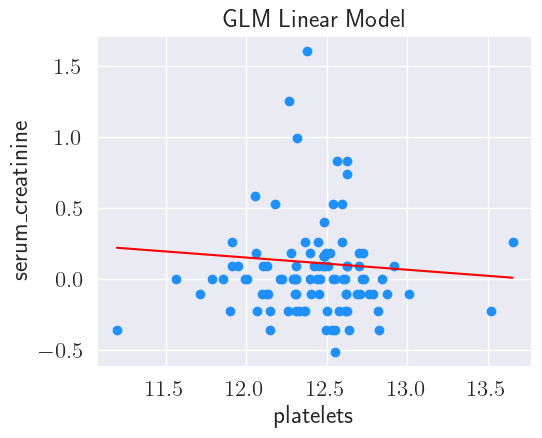

In [19]:
# Metrics for GLM #2 linear regression model for survivors.
s_glr_metrics2: LinearModelMetrics = survivors_linear_model_analytics.glm2
print(f"GLM coefficients: {s_glr_metrics2.coefficients}")
print(f"Sum of Squared Errors (SSE): {s_glr_metrics2.sse}")
s_glr_metrics2.plot("GLM Linear Model")

Simple linear coefficients: [-1.50858345e-06]
Sum of Squared Errors (SSE): 115.9134660820279


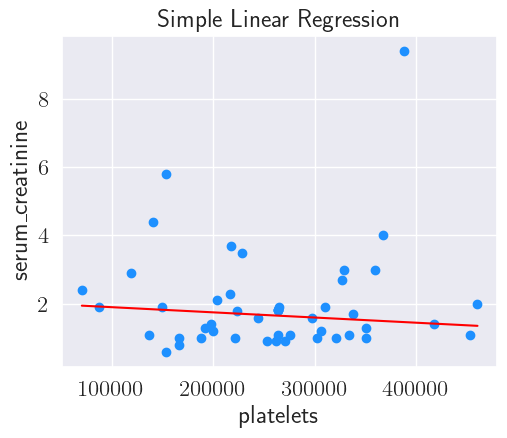

In [20]:
# Metrics for simple linear regression model for deceased.
d_slr_metrics: LinearModelMetrics = deceased_linear_model_analytics.simple
print(f"Simple linear coefficients: {d_slr_metrics.coefficients}")
print(f"Sum of Squared Errors (SSE): {d_slr_metrics.sse}")
d_slr_metrics.plot("Simple Linear Regression")

Quadratic coefficients: [-2.30057834e-06  1.30680369e-12]
Sum of Squared Errors (SSE): 115.93228954984559


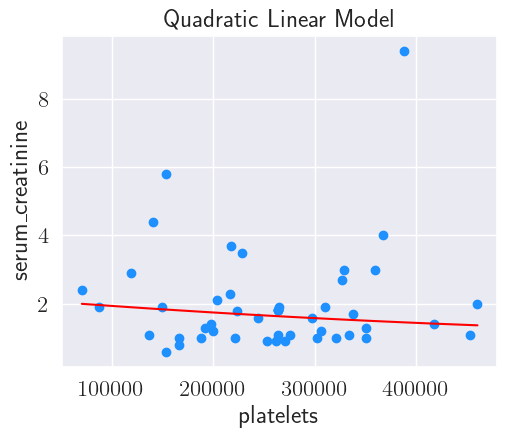

In [21]:
# Metrics for quadratic linear regression model for deceased.
d_qlr_metrics: LinearModelMetrics = deceased_linear_model_analytics.quadratic
print(f"Quadratic coefficients: {d_qlr_metrics.coefficients}")
print(f"Sum of Squared Errors (SSE): {d_qlr_metrics.sse}")
d_qlr_metrics.plot("Quadratic Linear Model")

Cubic coefficients: [ 1.35239944e-05 -5.81138353e-11  6.23505583e-17]
Sum of Squared Errors (SSE): 123.9189215252172


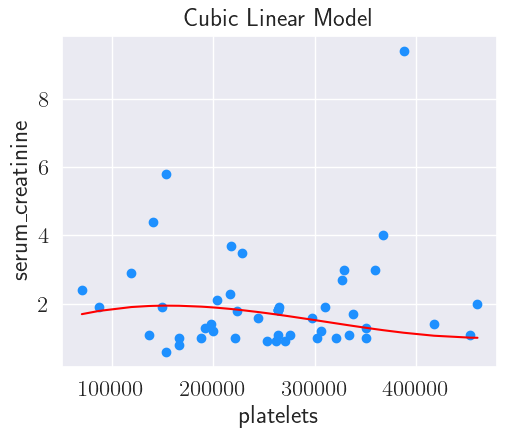

In [22]:
# Metrics for cubic linear regression model for deceased.
d_clr_metrics: LinearModelMetrics = deceased_linear_model_analytics.cubic
print(f"Cubic coefficients: {d_clr_metrics.coefficients}")
print(f"Sum of Squared Errors (SSE): {d_clr_metrics.sse}")
d_clr_metrics.plot("Cubic Linear Model")

GLM coefficients: [-0.24702019]
Sum of Squared Errors (SSE): 114.70447814044553


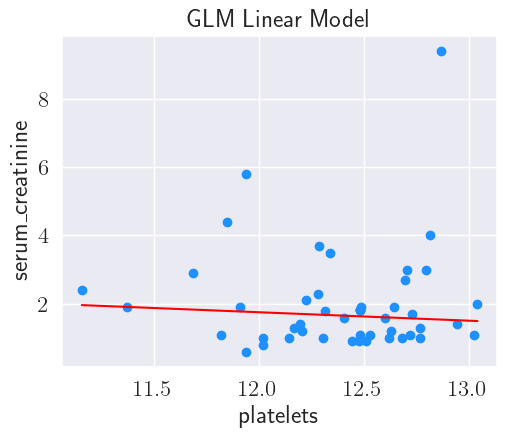

In [23]:
# Metrics for GLM #1 linear regression model for deceased.
d_glr_metrics1: LinearModelMetrics = deceased_linear_model_analytics.glm1
print(f"GLM coefficients: {d_glr_metrics1.coefficients}")
print(f"Sum of Squared Errors (SSE): {d_glr_metrics1.sse}")
d_glr_metrics1.plot("GLM Linear Model")

GLM coefficients: [-0.08149637]
Sum of Squared Errors (SSE): 16.00486682454328


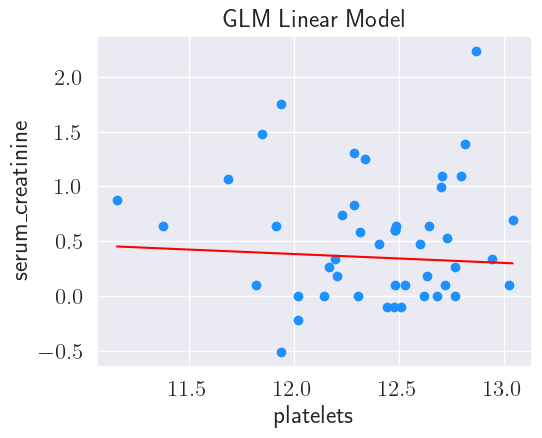

In [24]:
# Metrics for GLM #2 linear regression model for deceased.
d_glr_metrics2: LinearModelMetrics = deceased_linear_model_analytics.glm2
print(f"GLM coefficients: {d_glr_metrics2.coefficients}")
print(f"Sum of Squared Errors (SSE): {d_glr_metrics2.sse}")
d_glr_metrics2.plot("GLM Linear Model")

In [25]:
# Summarize the results of SSE of all models in a table.
sse_results: DataFrame = LinearModelAnalytics.sse_table(
    survivors_linear_model_analytics,
    deceased_linear_model_analytics
)

In [26]:
# Build latex SSE table to render in the document.
sse_table = create_latex_table(
    sse_results,
    label="tab:question3",
    caption="Question 3"
)
Latex(sse_table)

<IPython.core.display.Latex object>

In [27]:
# Get the best model for the survivors.
s_best_model = survivors_linear_model_analytics.best_model
print(
    f"The best model for the survivors is {s_best_model.name}"
    f" with an SSE value of "
    f"\n{s_best_model.sse:.3f}"
)

# Get the best model for the deceased.
d_best_model = deceased_linear_model_analytics.best_model
print(
    f"The best model for the deceased is {d_best_model.name}"
    f" with an SSE value of "
    f"\n{d_best_model.sse:.3f}"
)

The best model for the survivors is GLM #2 Model with an SSE value of 
11.442
The best model for the deceased is GLM #2 Model with an SSE value of 
16.005


In [28]:
# Get the worst model for the survivors.
s_worst_model = survivors_linear_model_analytics.worst_model
print(
    f"The worst model for the survivors is {s_worst_model.name}"
    f" with an SSE value of "
    f"\n{s_worst_model.sse:.3f}"
)

# Get the worst model for the deceased.
d_worst_model = deceased_linear_model_analytics.worst_model
print(
    f"The worst model for the deceased is {d_worst_model.name}"
    f" with an SSE value of "
    f"\n{d_worst_model.sse:.3f}"
)

The worst model for the survivors is Cubic Spline Model with an SSE value of 
52.426
The worst model for the deceased is Cubic Spline Model with an SSE value of 
123.919
